In [1]:
import os   
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_pickle(filepath):
    with open(filepath, "rb") as f:
        json_data = pickle.load(f)
    return json_data

In [2]:
data_path = f"./tempo_estimation_output/tempo_45_140/plotting_data/"
os.listdir(data_path)

df_multi_1 = load_pickle(os.path.join(data_path, 'genre_hit_multi_bothhand_y_bothfoot_y.pkl'))
df_multi_2 = load_pickle(os.path.join(data_path, 'genre_hit_multi_bothhand_y_bothfoot_y_torso_y.pkl'))

df_best_1 = load_pickle(os.path.join(data_path,  'genre_hit_best_of_n_both_hand_y_both_foot_y.pkl'))
df_best_2 = load_pickle(os.path.join(data_path,   'genre_hit_best_of_n_both_hand_y_both_foot_y_torso_y.pkl'))


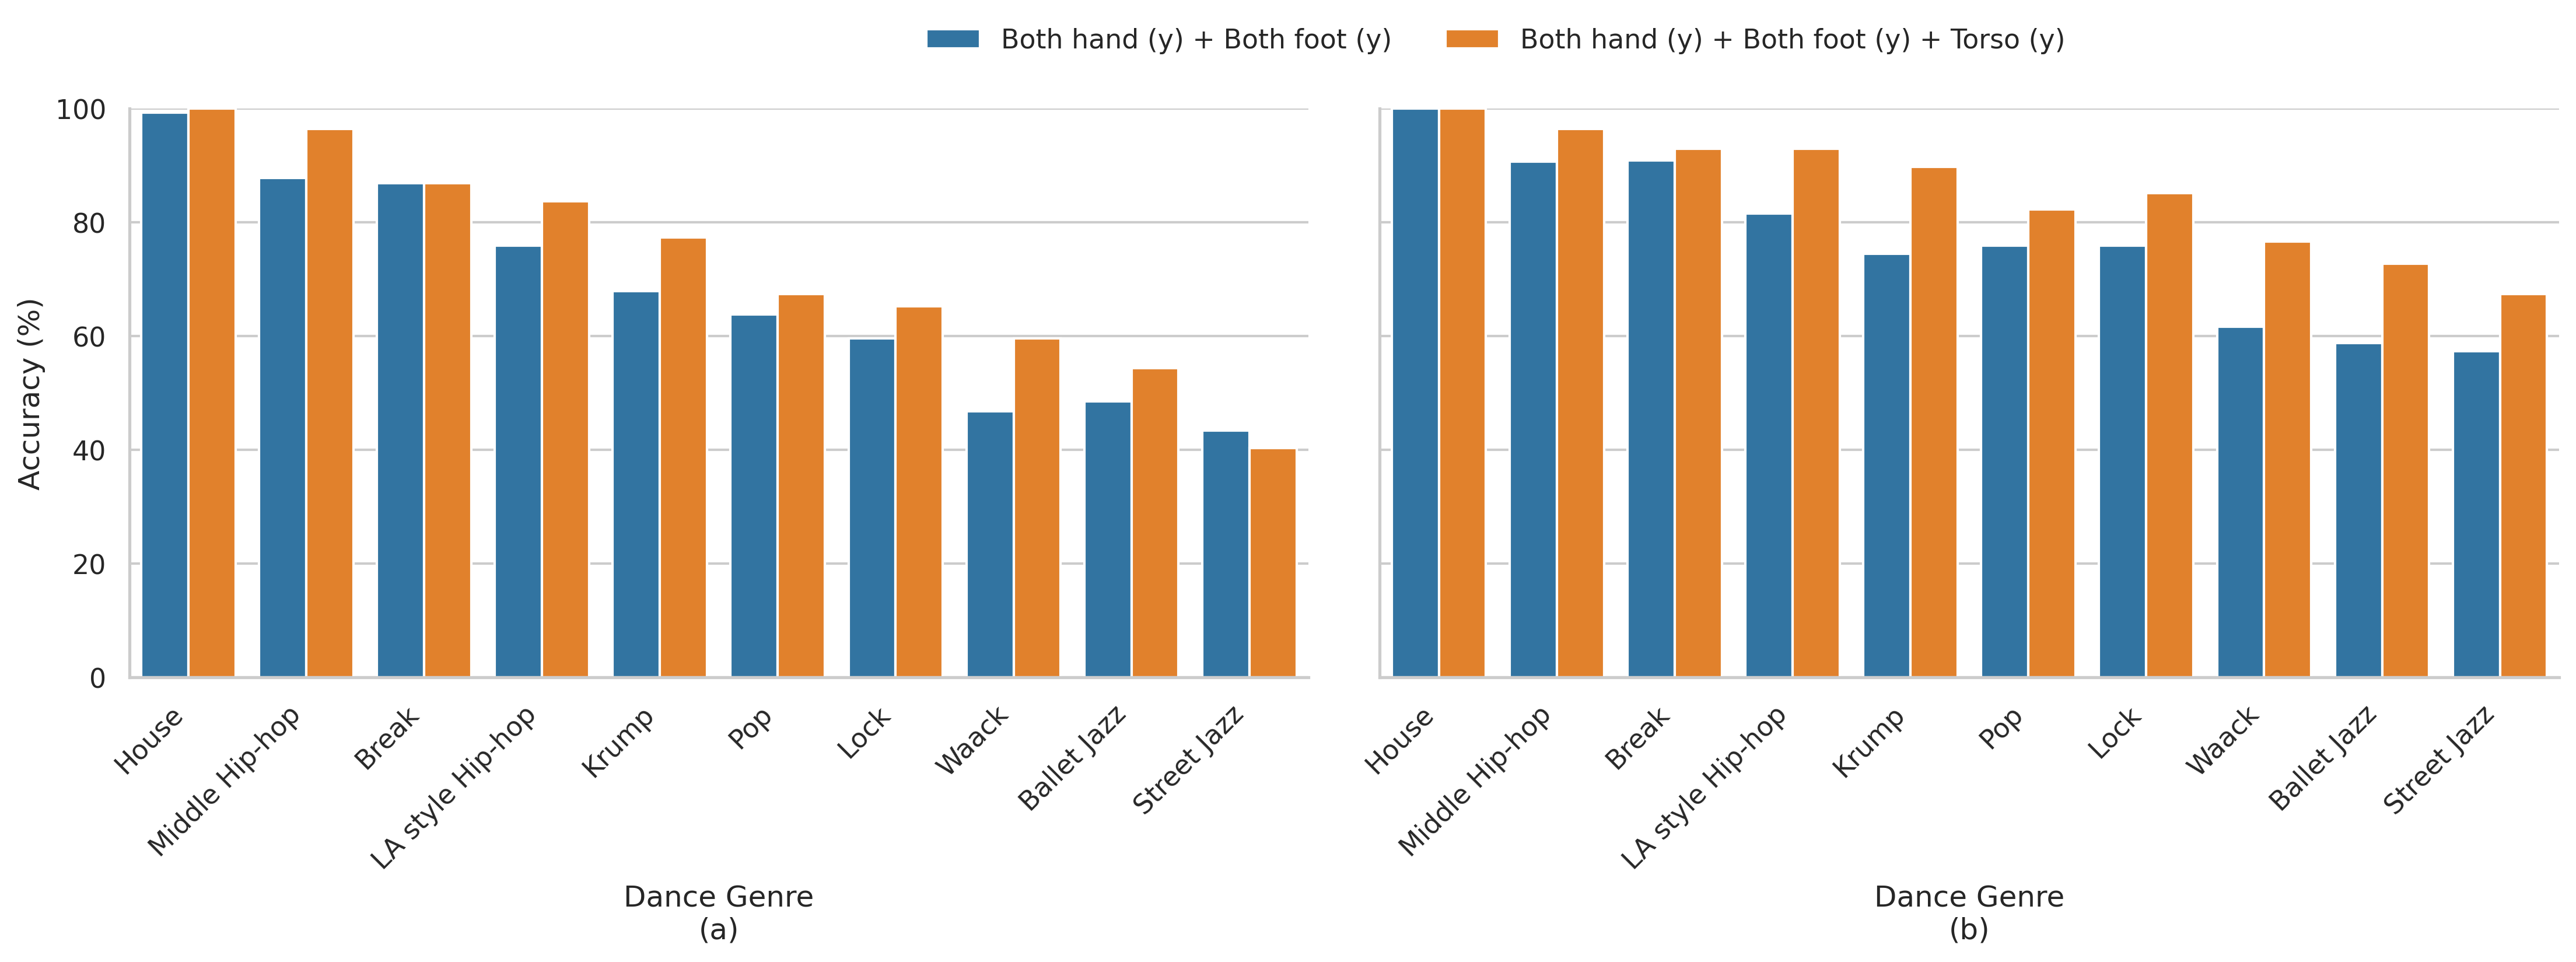

In [3]:
# --- Label and combine ------------------------------------------------
df_multi_1["Segment"] = "Both hand (y) + Both foot (y)"
df_multi_2["Segment"] = "Both hand (y) + Both foot (y) + Torso (y)"
df_multi_1["Metric"] = "Zero velocity marker"
df_multi_2["Metric"] = "Zero velocity marker"

df_best_1["Segment"] = "Both hand (y) + Both foot (y)"
df_best_2["Segment"] = "Both hand (y) + Both foot (y) + Torso (y)"
df_best_1["Metric"] = "Best-of-three strategy"
df_best_2["Metric"] = "Best-of-three strategy"

combined_df = pd.concat([df_multi_1, df_multi_2, df_best_1, df_best_2], ignore_index=True)

# --- Rename columns ---------------------------------------------------
combined_df = combined_df.rename(columns={"genre": "Dance Genre", "hit_percentage": "Accuracy"})

# --- Plot styling -----------------------------------------------------
sns.set_theme(style="whitegrid")

palette = {
    "Both hand (y) + Both foot (y)": sns.color_palette("tab10")[0],
    "Both hand (y) + Both foot (y) + Torso (y)": sns.color_palette("tab10")[1],
}

genre_order = ['House', 'Middle Hip-hop', 'Break','LA style Hip-hop',
				'Krump', 'Pop','Lock', 'Waack', 'Ballet Jazz', 'Street Jazz']

# --- Grouped bar plot -------------------------------------------------
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="Dance Genre",
    y="Accuracy",
    hue="Segment",
    col="Metric",
    palette=palette,
    height=5,
    aspect=1.2,
    sharey=True,
    legend=True,
    order=genre_order
)

# --- Formatting -------------------------------------------------------
g.figure.set_dpi(300)
g.set_axis_labels("Dance Genre", "Accuracy (%)")
g.set_titles("")
g.set_xticklabels(rotation=45, ha="right")
g.set(ylim=(0, 100))
g.figure.subplots_adjust(bottom=0.25, top=0.9)

# Custom legend
g._legend.remove()
g.add_legend(title="", bbox_to_anchor=(0.42, 1.02),
             loc="upper center", ncol=2)

# Label panels (a), (b)
for ax, label in zip(g.axes.flat, ['(a)', '(b)']):
    ax.set_xlabel(ax.get_xlabel() + f"\n{label}")

plt.show()


In [6]:
combined_df

import pandas as pd

combined_df.to_csv('new_genrewise_data.csv', index=False)